## Описание проекта

 - Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
 - Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
 - Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
 - В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

 * Name — название игры
 * Platform — платформа
 * Year_of_Release — год выпуска
 * Genre — жанр игры
 * NA_sales — продажи в Северной Америке (миллионы долларов)
 * EU_sales — продажи в Европе (миллионы долларов)
 * JP_sales — продажи в Японии (миллионы долларов)
 * Other_sales — продажи в других странах (миллионы долларов)
 * Critic_Score — оценка критиков (максимум 100)
 * User_Score — оценка пользователей (максимум 10)
 * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
 
Данные за 2016 год могут быть неполными.

In [271]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math

In [272]:
data_games = pd.read_csv('/datasets/games.csv')

In [273]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [274]:
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Поля с пропусками

 * Name, Genre               - возможная ошибка при выгрузки из открытых источников
 * Year_of_Release    - игра выходила в разные годы в разных частях света, плюс локализация, 
 * Critic_Score, User_Score  - Есть несколько вероятностей пустых значений:
     * игра вышла до появления СМИ об играх и вообще интернета как такового
     * на момент выгрузки из открытытх источников игра еще не получила вердикт критиков (геймеров)
     * и, возможно, вообще не заслужила право быть оцененной
 * Rating             - Рейтинг игр ESRB - на территории США и Канады, видимо не все игры из нашей выборки попали в руки ESRB, возможно цензура;)(PEGI — европейская рейтинговая система, CERO — японская)

## Подготовим данные

### Переведем названия столбцов к нижнему регистру

In [275]:
data_games.columns = data_games.columns.str.lower()

### Заменим тип в следующих полях:

* Year_of_Release    float64 в int64
* Critic_Score       float64 в int
* User_Score         object во float

In [276]:
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64')                                             

In [277]:
data_games['critic_score'] = data_games['critic_score'].astype('Int64')

Значение tbd означает дословно "Будет определено", следовательно в наших данных оценок для игры еще нет, заменим на nan  

In [278]:
data_games['user_score'].replace('tbd', math.nan, inplace = True)
data_games['user_score'] = data_games['user_score'].astype('Float64')

In [279]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Пропуски

 * Name, Genre               - ошибка выгрузки из открытых источников, можно удалить (таких игр две)
 * Year_of_Release    - игра выходила в разные годы в разных частях света, плюс локализация, оставим текущие значения (таких игр около 270)
 * Critic_Score, User_Score  - пропусков здесь - половина из доступных данных, стоит оставить как есть. Есть несколько вероятностей пустых значений:
     * игра вышла до появления СМИ об играх и вообще интернета как такового
     * на момент выгрузки из открытытх источников игра еще не получила вердикт критиков (геймеров)
     * и, возможно, вообще не заслужила право быть оцененной
 * Rating             - пропусков здесь - половина из доступных данных, стоит оставить как есть. Рейтинг игр ESRB - на территории США и Канады, видимо не все игры из нашей выборки попали в руки ESRB, возможно цензура;)(PEGI — европейская рейтинговая система, CERO — японская)

In [280]:
data_games.dropna(subset=['name', 'genre'], inplace = True)

При условии разбиения отзывов критиков и геймеров на регионы, можно было бы заполнить пустые поля исходя из жанра, платформы и продаж конкретной игры. И то, с учетом, меньшего количества пропусков, у нас их половина.

### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [281]:
data_games['sum_sales'] = (data_games['na_sales'] + data_games['eu_sales'] + 
                           data_games['jp_sales'] + data_games['other_sales']
                          )

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

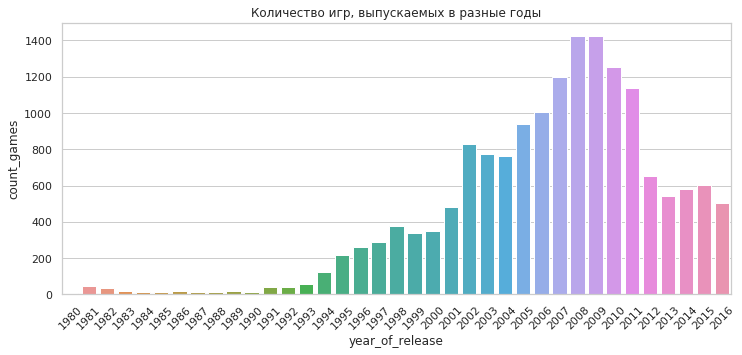

In [332]:
count_games = data_games.pivot_table(index = 'year_of_release', values = 'name', 
                                     aggfunc = 'count')
count_games.columns = (['count_games'])

sns.set(style="whitegrid")

fig, axes = plt.subplots(figsize=(12, 5))

axes.set_title('Количество игр, выпускаемых в разные годы')

axes.set_xticklabels(labels = count_games.index, rotation=45)

sns.barplot(y = count_games['count_games'], x = count_games.index, ax = axes);


<b>Кол-во игр, выпущенных в год. Здесь можно наблюдать как развивалась игровая индустрия по годам. После 1993 года наблюдается подъем игровой индустрии с пиком на 2008-2009 годы и небольшим спадом в последние годы</b>

### Посмотрим, как менялись продажи по платформам.

#### Выбираем 10 платформ с наибольшими суммарными продажами и построим распределение по годам.

In [283]:
top_platform = (data_games.pivot_table(index = 'platform', 
                                                                       values = 'sum_sales', 
                                                                       aggfunc = 'sum').
                sort_values(by = 'sum_sales', ascending = False).index.to_series().head(10)
               )

In [284]:
platform_year = (data_games.pivot_table(index = ['year_of_release','platform'], 
                                                    values = 'sum_sales', aggfunc = 'sum'))
platform_year.reset_index(inplace = True)

platform_year.set_index('year_of_release', inplace = True)

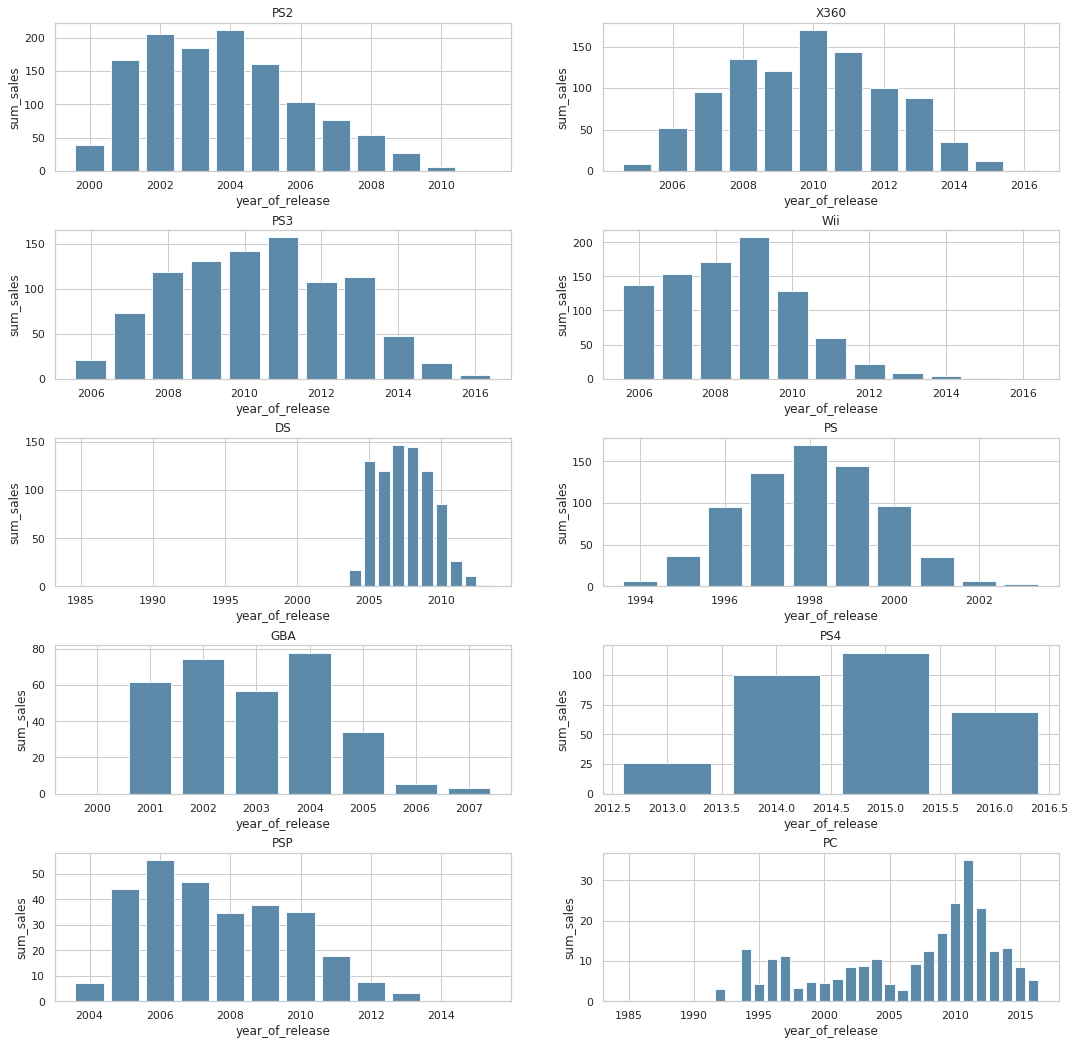

In [285]:
fig, axes = plt.subplots(5, 2, figsize=(18, 18))
fig.subplots_adjust(hspace = .4)
ax = axes.flatten()
i = 0

for console in top_platform:
    
    tmp = platform_year[platform_year['platform'] == console]
    ax[i].set_title(console)
    ax[i].set_ylabel('sum_sales')
    ax[i].set_xlabel('year_of_release')
    ax[i].bar(x = tmp.index,height = tmp['sum_sales'],color = '#5D8AA8',edgecolor = '#F0F8FF')
    
    i += 1  

In [286]:
platform_age = (data_games.pivot_table(index = 'platform', values = 'year_of_release', 
                                       aggfunc = ['min','max'])
)

platform_age['age'] = (
platform_age[('max', 'year_of_release')] - platform_age[('min', 'year_of_release')])

In [287]:
platform_age.sort_values(by = 'age', ascending  = False).head()

,min,max,age
,year_of_release,year_of_release,
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11


In [288]:
platform_age.sort_values(by = 'age').head()

,min,max,age
,year_of_release,year_of_release,
platform,,,
GG,1992,1992,0
PCFX,1996,1996,0
TG16,1995,1995,0
3DO,1994,1995,1
SCD,1993,1994,1


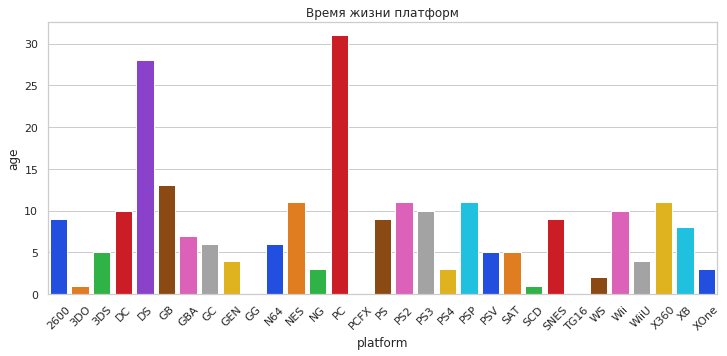

In [289]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(figsize=(12, 5))

axes.set_xticklabels(labels = platform_age.index, rotation=45)

axes.set_title('Время жизни платформ')

sns.barplot(y = platform_age['age'], x = platform_age.index, palette = 'bright', ax = axes);

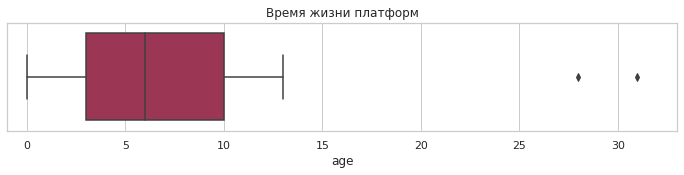

In [290]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 2))
ax.set_xlim(-1, 33)
ax.set_title('Время жизни платформы')
sns.boxplot(x=platform_age['age'], color = '#AB274F',ax = ax);

Существуют выбросы по продолжительности жизни платформы как PC (вероятно будет существовать все время жизни индустрии) и DS, живущие 31 год и 28 лет соответственно. Так и платформы с нулевым временем жизни: GG,PCFX,TG16. Поэтому посчитаем значение медианы продолжительности жизни консолей.

In [291]:
np.median(platform_age['age'])

6.0

<b>В среднем время жизни платформы - 6 лет </b>

<b>В рассмотрение должно попасть только последнее поколения платформ, конечный на данный момент интервал развития игровой индустрии - последние 3 года, но так как данные за 2016 год неполные, для проведения исследования и прогноза на 2017 год, возьмем игры с 2013 по 2016 год</b>

In [292]:
act_data_games = data_games.query('year_of_release > 2012')

### Какие платформы лидируют по продажам, растут или падают

<b>Выбираем 10 платформ с наибольшими продажами за актуальный период</b>

In [293]:
top_actual_plat = (act_data_games.pivot_table(index = 'platform', 
                                                                       values = 'sum_sales', 
                                                                       aggfunc = 'sum').
                sort_values(by = 'sum_sales', ascending = False).head(10).index.to_series()
               )

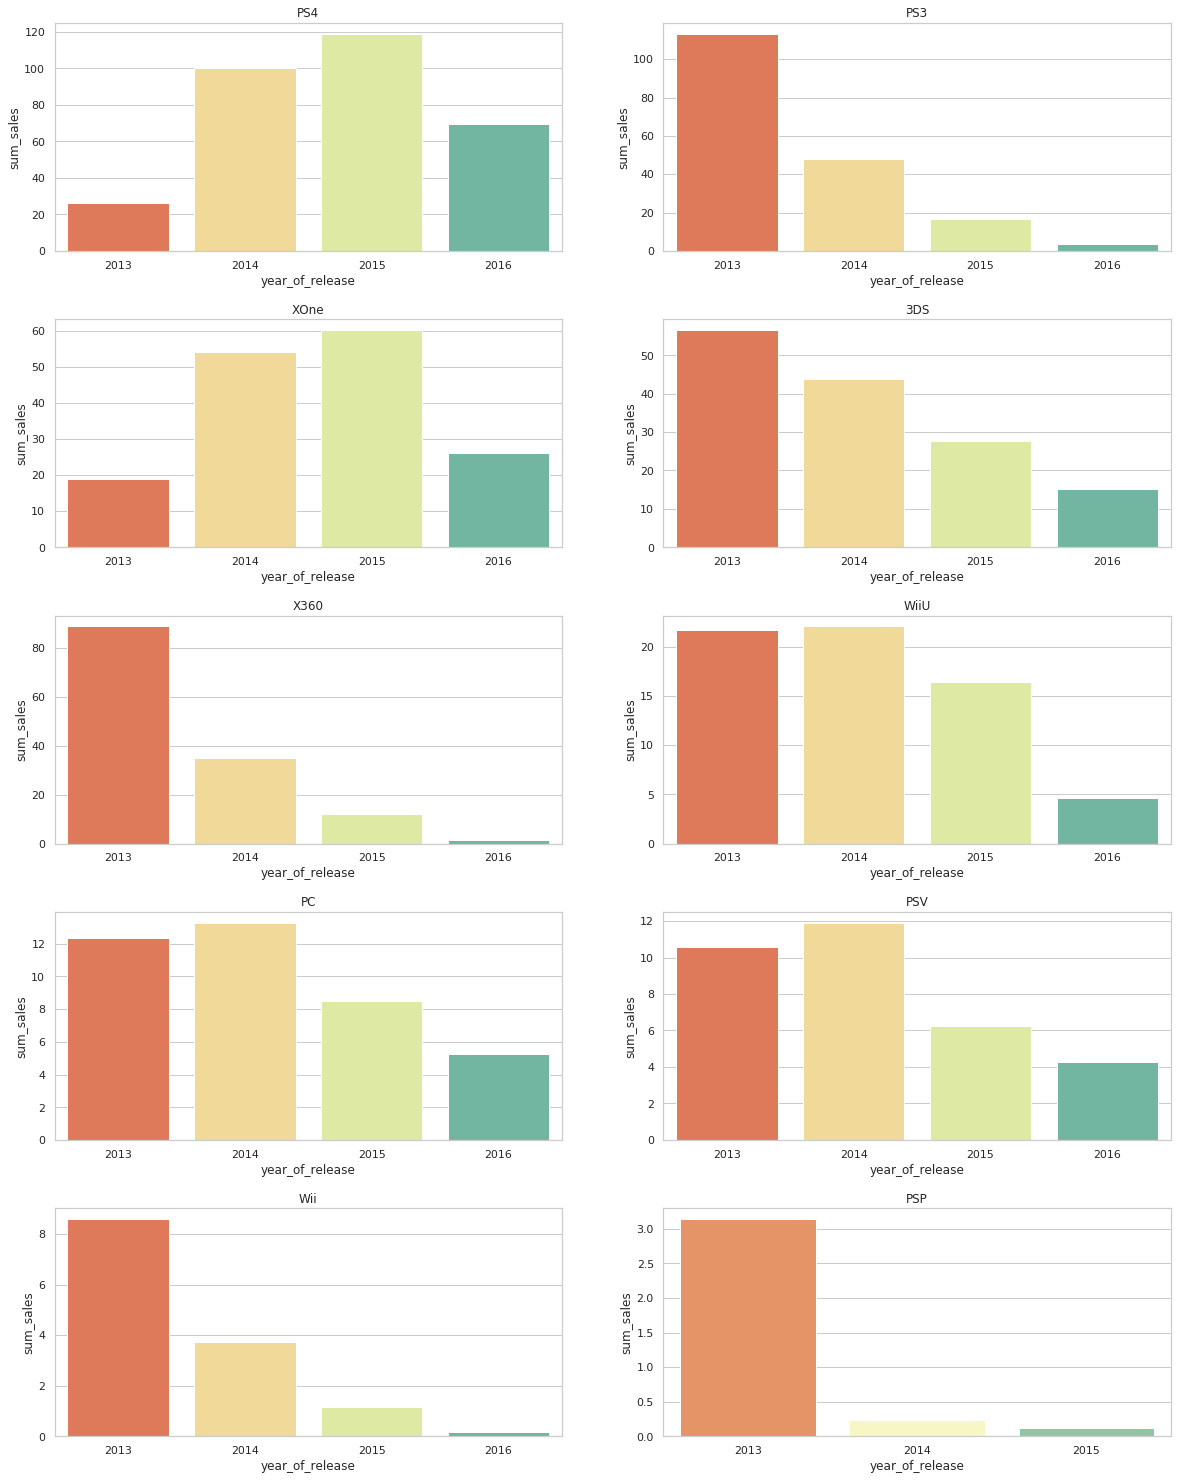

In [294]:
platform_sale = (act_data_games.pivot_table(index = ['year_of_release','platform'], 
                                                         values = 'sum_sales', aggfunc = 'sum').
                                                         sort_values(by = ['sum_sales'], ascending = False))
fig, axes = plt.subplots(5, 2, figsize=(20, 26))
fig.subplots_adjust(hspace = .3)
ax = axes.flatten()
i = 0
platform_sale.reset_index(inplace = True)

for console in top_actual_plat:
    
    tmp = platform_sale[platform_sale['platform'] == console]
    ax[i].set_title(console)
    sns.barplot(x = tmp['year_of_release'], y = tmp['sum_sales'], ax=ax[i], palette = 'Spectral')
    i += 1

<b>За актуальный период лидеры по продажам PS4, PS3 и XOne. Рост показывают PS4 и XOne. Остальные показывают стагнацию; PS3, X360 - уступают места преемникам. На данном этапе анализа потенциально прибыльными выглядят  PS4 и XOne.</b>

### Построим график «ящик с усами» по глобальным продажам

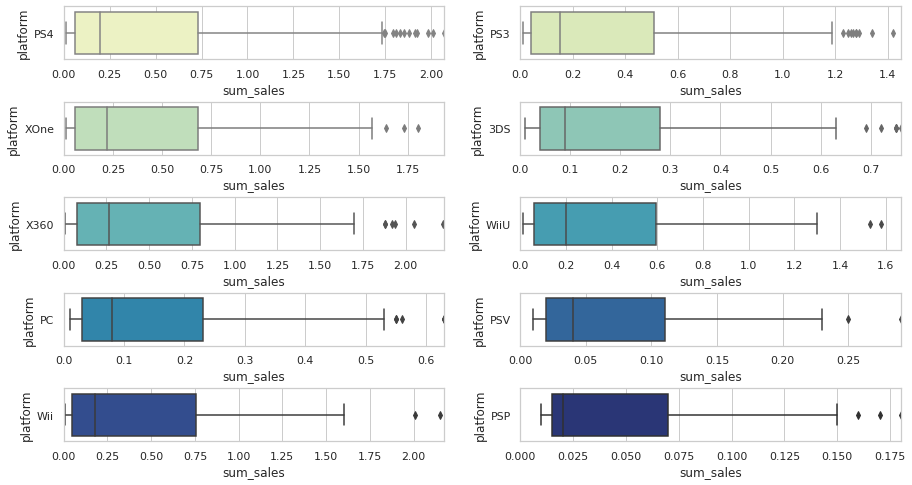

In [295]:
fig, axes = plt.subplots(5, 2, figsize=(15, 8));
fig.subplots_adjust(hspace = .8)
current_palette = sns.color_palette('YlGnBu', n_colors=10)
ax = axes.flatten()
i = 0
platform_mean = {}
for console in top_actual_plat:
    
    tmp = act_data_games[act_data_games['platform'] == console]
    iqr = (tmp['sum_sales'].quantile(0.75) - tmp['sum_sales'].quantile(0.25)) * 2
    ax[i].set_xlim(0, iqr + tmp['sum_sales'].quantile(0.75))
    sns.boxplot(y="platform", x="sum_sales", data = tmp, color = current_palette[i],
            orient="h", ax = ax[i])
    platform_mean[console] = np.mean(tmp['sum_sales'])
    i += 1

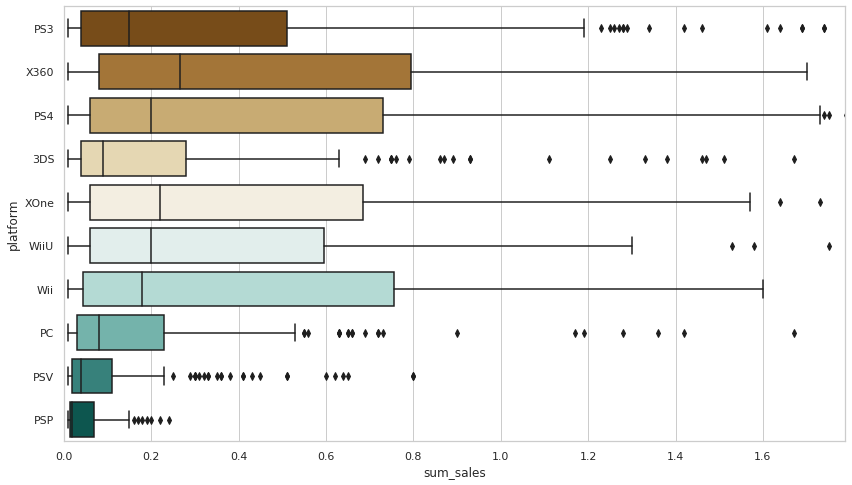

In [296]:
fig, axes = plt.subplots(figsize=(14, 8))
sns.set(style="whitegrid")
iqr = (act_data_games['sum_sales'].quantile(0.75) - act_data_games['sum_sales'].quantile(0.25)) * 3.75
axes.set_xlim(0, iqr + act_data_games['sum_sales'].quantile(0.75))                       
(sns.boxplot(y=act_data_games.query('platform in @top_actual_plat')["platform"], x="sum_sales", 
            data = act_data_games, ax = axes, palette = 'BrBG',orient = 'h')
);

<b>На всех диаграммах датасет скошен вправо, потенциал игрового рынка высок на всех платформах. Разница в продажах четверки (X360,XOne,Wii,PS4) занчительно выше остальных платформ.</b>

In [297]:
platform_mean

{'PS4': 0.8013775510204081,
 'PS3': 0.5258840579710146,
 'XOne': 0.6450202429149797,
 '3DS': 0.47277227722772275,
 'X360': 0.735483870967742,
 'WiiU': 0.562,
 'PC': 0.20862433862433863,
 'PSV': 0.09215083798882683,
 'Wii': 0.5939130434782607,
 'PSP': 0.05223880597014925}

In [298]:
sorted(platform_mean, key=platform_mean.get, reverse=True)

['PS4', 'X360', 'XOne', 'Wii', 'WiiU', 'PS3', '3DS', 'PC', 'PSV', 'PSP']

<b><h4>А в средних продажах выделяется PS4, которая сравнительно недавно на рынке, но показывает уже большие продажи. Она приходит на смену PS3, плюс большое количество игр, как мультиплатформеров, так и экcклюзивов.</h4></b>

***Такая разница, мне кажется, образуется из-за того, что разработка игр ведется прежде всего для ведущих платформ - PS4, XOne. После, игры портируют на оставшиеся консоли (если вообще портируют), что влечет дополнительные затраты, следовательно цена игры увеличивается, их берут меньше, выручка падает.***

### Посмотрим, как влияют на продажи внутри PS4 отзывы пользователей и критиков.

<b>Посчитаем корреляцию общих продаж с отзывами критиков и геймеров и построим диаграммы размаха для каждого соотношения.</b>

In [299]:
act_data_ps4 = act_data_games.query('platform == "PS4"')

cor_crit = (act_data_ps4['sum_sales'].astype('float').
    corr(act_data_ps4['critic_score'].astype('float'))
           )
cor_user = (act_data_ps4['sum_sales'].astype('float').
            corr(act_data_ps4['user_score']).astype('float')
           )

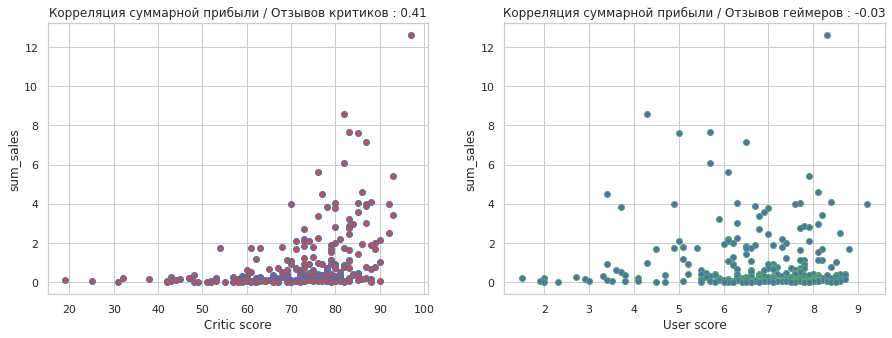

In [300]:
f, axes = plt.subplots(1,2,figsize=(15, 5))

axes[0].set_title('Корреляция суммарной прибыли / Отзывов критиков : ' + str(cor_crit.round(2)))
axes[0].set_ylabel('sum_sales')
axes[0].set_xlabel('Critic score')
axes[0].scatter(x="critic_score", y="sum_sales",data=act_data_ps4,c='r', edgecolor='b')
axes[0].grid(True);

axes[1].set_title("Корреляция суммарной прибыли / Отзывов геймеров : " + str(cor_user.round(2)))
axes[1].set_xlabel('User score')
axes[1].set_ylabel('sum_sales')
axes[1].scatter(x="user_score", y="sum_sales",data=act_data_ps4,c='b', edgecolor='g')
axes[1].grid(True);

<b>Корреляция суммарной прибыли / Отзывов критиков (0.41). Связь есть, но не достаточно сильная. Не все при покупке игры, отталкиваются на отзывы критиков. Кроме того есть вероятность, что критики могут быть просто предвзяты при оценке.</b>

<b>Корреляция суммарной прибыли / Отзывов геймеров(-0.03). Связь отсутствует полностью. Очень многое зависит от активности пользователей при оценке игры. Например игры от Electronic Arts, очень много негативных отзывов из года в год, тем не менее продажи растут. </b>

### Соотнесем выводы с продажами игр на других платформах.

In [301]:
scatter_ps4 = top_actual_plat.drop('PS4')
relative_corr = (pd.DataFrame(columns = ['platform','corr_critic','rel_critic_ps4','corr_user',
                                         'rel_user_ps4']).
                                        astype('object'))
scatter_ps4 = scatter_ps4.to_list()

In [302]:
for console in scatter_ps4:
    
    tmp = act_data_games[act_data_games['platform'] == console]
    
    tmp_cor_crit = (tmp['sum_sales'].astype('float').
    corr(tmp['critic_score'].astype('float')))
    
    tmp_cor_user = (tmp['sum_sales'].astype('float').
    corr(tmp['user_score'].astype('float')))
            
    if cor_crit > tmp_cor_crit: 
        rel_crit = 'меньше, чем PS4'
    else:
        rel_crit = 'выше, чем PS4'
             
    if cor_user > tmp_cor_user:
        rel_user = 'меньше, чем PS4'
    else:
        rel_user = 'выше, чем PS4'
    relative_corr.loc[scatter_ps4.index(console)] = (
        [console, tmp_cor_crit, rel_crit, tmp_cor_user, rel_user])   

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [303]:
relative_corr

,platform,corr_critic,rel_critic_ps4,corr_user,rel_user_ps4
0,PS3,0.334285,"меньше, чем PS4",0.002394,"выше, чем PS4"
1,XOne,0.416998,"выше, чем PS4",-0.068925,"меньше, чем PS4"
2,3DS,0.357057,"меньше, чем PS4",0.241504,"выше, чем PS4"
3,X360,0.350345,"меньше, чем PS4",-0.011742,"выше, чем PS4"
4,WiiU,0.376415,"меньше, чем PS4",0.419330,"выше, чем PS4"
5,PC,0.196030,"меньше, чем PS4",-0.093842,"меньше, чем PS4"
6,PSV,0.254742,"меньше, чем PS4",0.000942,"выше, чем PS4"
7,Wii,NaN,"выше, чем PS4",0.682942,"выше, чем PS4"
8,PSP,NaN,"выше, чем PS4",-1.000000,"меньше, чем PS4"


***Выделяется пятерка платформ с неплохой связью выручки с отзывами критиков. Кроме платформ  3DS, WiiU и Wii (видимо высокий отклик производителя на отзывы геймеров), наблюдается отсутсвие связи между отзывами пользователей и выручкой.***

***В Японии многие компании организуют интернет-сообщества и поддержку по телефону, что редко встретишь в Европе и  Северной Америке.***

### Анализ корреляции выручки с продаж и отзывами платформы XOne

In [304]:
act_data_xone = act_data_games.query('platform == "XOne"')

cor_crit_x = (act_data_xone['sum_sales'].astype('float').
    corr(act_data_xone['critic_score'].astype('float'))
           )
cor_user_x = (act_data_xone['sum_sales'].astype('float').
            corr(act_data_xone['user_score']).astype('float')
           )

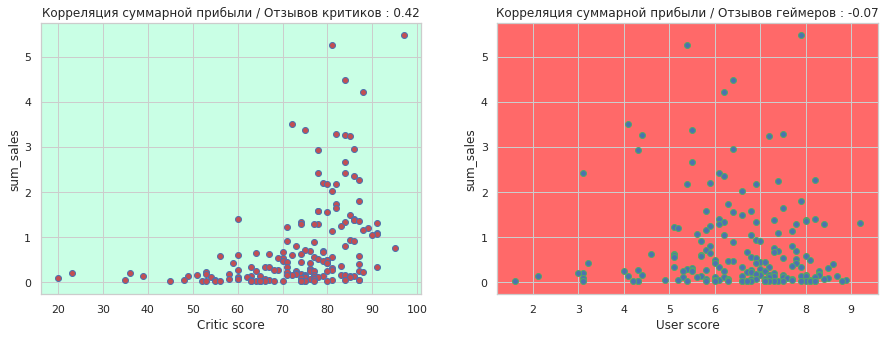

In [325]:
f, axes = plt.subplots(1,2,figsize=(15, 5))

axes[0].set_title('Корреляция суммарной прибыли / Отзывов критиков : ' + str(cor_crit_x.round(2)))
axes[0].set_facecolor(color = '#C9FFE5')
axes[0].set_ylabel('sum_sales')
axes[0].set_xlabel('Critic score')
axes[0].scatter(x="critic_score", y="sum_sales",data=act_data_xone,c='r', edgecolor='b')
axes[0].grid(True);

axes[1].set_title("Корреляция суммарной прибыли / Отзывов геймеров : " + str(cor_user_x.round(2)))
axes[1].set_facecolor(color = '#ff6969')
axes[1].set_xlabel('User score')
axes[1].set_ylabel('sum_sales')
axes[1].scatter(x="user_score", y="sum_sales",data=act_data_xone,c='b', edgecolor='g')
axes[1].grid(True);

<b>Корреляция суммарной прибыли / Отзывов критиков (0.42). Связь есть, но не достаточно сильная. Корреляция похожа с PS4, так как чаще всего игры выпускают сразу для этих платформ.</b>

<b>Корреляция суммарной прибыли / Отзывов геймеров(-0.07). Связь отсутствует полностью. Отношение схоже с PS4. Очень большой рынок охвата для анализа, наверняка в разных регионах корреляция разная.  </b>

In [321]:
scatter_xone = top_actual_plat.drop('XOne')
relative_corr_xone = (pd.DataFrame(columns = ['platform','corr_critic','rel_critic_xone','corr_user',
                                         'rel_user_xone']).
                                        astype('object'))
scatter_xone = scatter_xone.to_list()

In [322]:
for console in scatter_xone:
    
    tmp = act_data_games[act_data_games['platform'] == console]
    
    tmp_cor_crit = (tmp['sum_sales'].astype('float').
    corr(tmp['critic_score'].astype('float')))
    
    tmp_cor_user = (tmp['sum_sales'].astype('float').
    corr(tmp['user_score'].astype('float')))
            
    if cor_crit_x > tmp_cor_crit: 
        rel_crit = 'меньше, чем XOne'
    else:
        rel_crit = 'выше, чем XOne'
             
    if cor_user_x > tmp_cor_user:
        rel_user = 'меньше, чем XOne'
    else:
        rel_user = 'выше, чем XOne'
    relative_corr_xone.loc[scatter_xone.index(console)] = (
        [console, tmp_cor_crit, rel_crit, tmp_cor_user, rel_user])   

In [323]:
relative_corr_xone

,platform,corr_critic,rel_critic_xone,corr_user,rel_user_xone
0,PS4,0.406568,"меньше, чем XOne",-0.031957,"выше, чем XOne"
1,PS3,0.334285,"меньше, чем XOne",0.002394,"выше, чем XOne"
2,3DS,0.357057,"меньше, чем XOne",0.241504,"выше, чем XOne"
3,X360,0.350345,"меньше, чем XOne",-0.011742,"выше, чем XOne"
4,WiiU,0.376415,"меньше, чем XOne",0.419330,"выше, чем XOne"
5,PC,0.196030,"меньше, чем XOne",-0.093842,"меньше, чем XOne"
6,PSV,0.254742,"меньше, чем XOne",0.000942,"выше, чем XOne"
7,Wii,NaN,"выше, чем XOne",0.682942,"выше, чем XOne"
8,PSP,NaN,"выше, чем XOne",-1.000000,"меньше, чем XOne"


***XOne - лидер по отношению выручки к отзывам критиков. По отзывам критиков остальные платформы (кроме PC) показывают корреляцию сильнее***

### Посмотрим на общее распределение игр по жанрам.

In [306]:
genre = (act_data_games.pivot_table(index = 'genre', values = 'sum_sales',
                        aggfunc = 'sum')).sort_values(by = 'sum_sales', ascending = False)

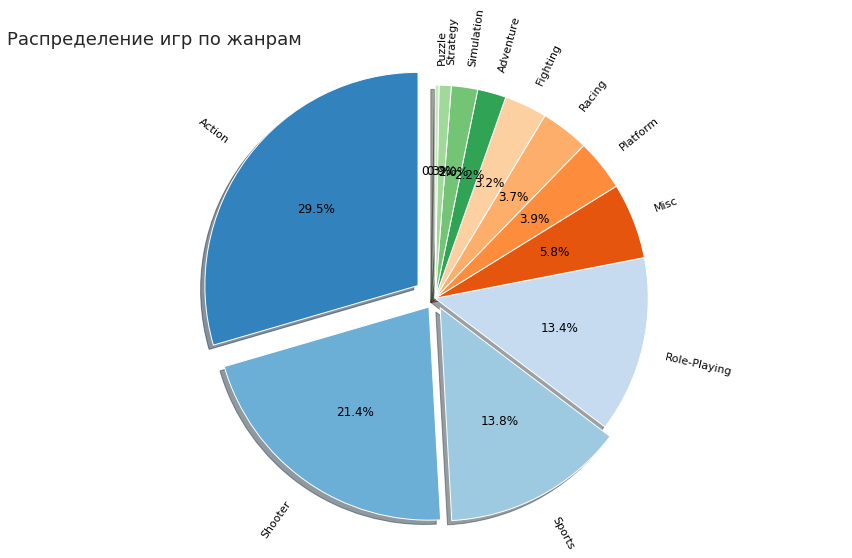

In [307]:
explode = [0.1,0.05,0.05,0,0,0,0,0,0,0,0,0]
fig, ax = plt.subplots(figsize = (12,8))

ax.set_title('Распределение игр по жанрам',loc = 'left',fontdict = {'fontsize' : 18})

ax.pie(genre['sum_sales'], shadow=True, startangle=90, explode = explode,
                           labels = genre.index, autopct = '%1.1f%%', 
                           textprops=dict(color="black"),rotatelabels=True, 
                           colors = plt.cm.tab20c.colors)
plt.axis('equal')
plt.tight_layout()
plt.show()

<b>Самые прибыльные жанры : Action, Sports, Shooter. Жанр Action достаточно общий, он характеризует игры, где много действия. А к ним относятся и Sports, и Action, и например Racing.</b>

<b>Низкие продажи в жанрах Strategy и Puzzle.</b>

## Составим портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

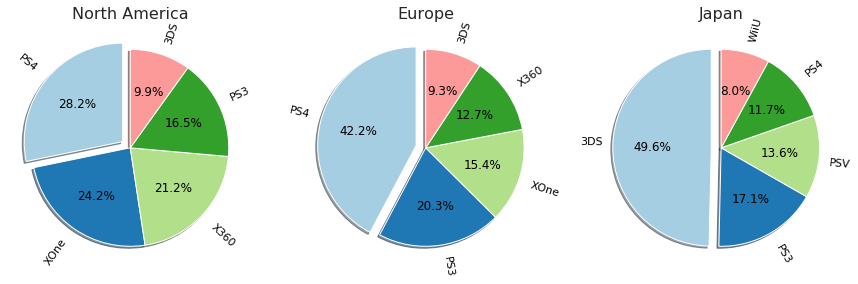

In [308]:
regions = {'North America':'na_sales','Europe':'eu_sales','Japan':'jp_sales'}
explode = [0.1,0,0,0,0]
fig, ax = plt.subplots(1, 3, figsize=(15, 8))
i = 0

for key, value in regions.items():
    
    tmp = (act_data_games.pivot_table(index = 'platform', values = value,
                                           aggfunc = 'sum').
                 sort_values(by = value, ascending = False).head()
                  )
        
    ax[i].set_title(key, fontdict = {'fontsize' : 16})
    
    ax[i].pie(tmp[value], shadow=True, startangle=90, explode = explode,
                           labels = tmp.index, autopct = '%1.1f%%', 
                           textprops=dict(color="black"),rotatelabels=True, 
                           colors = plt.cm.Paired.colors)
    i += 1

<b>В Северной Америке превалирует PS4, почти на равне идет еще XOne.</b>

<b>В Европе превалирует PS4. Аутсайдером выглядит 3DS</b>

<b>А в Японии впереди с отрывом 3DS.Индустрия мобильных игр в Японии просто совершенно иная. Пользователи там играют взахлёб, в игре должно быть много контента и (или) уровней, иначе игроки быстренько пройдут игру и уйдут навсегда. 
</b>

### Самые популярные жанры (топ-5).

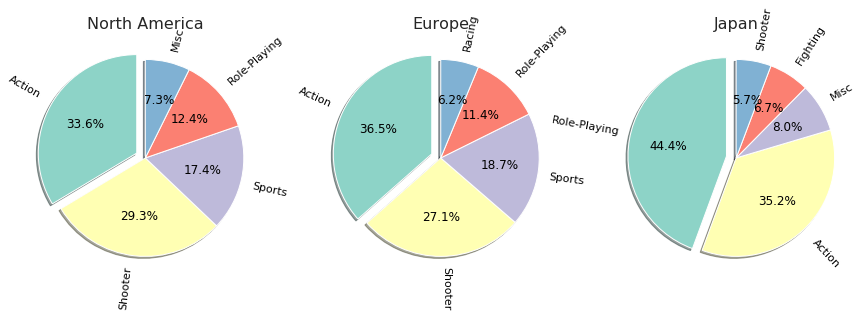

In [309]:
explode = [0.1,0,0,0,0]
fig, ax = plt.subplots(1, 3, figsize=(15, 8))
i = 0

for key, value in regions.items():
    
    tmp = (act_data_games.pivot_table(index = 'genre', values = value,
                                           aggfunc = 'sum').
                 sort_values(by = value, ascending = False).head()
                  )
        
    ax[i].set_title(key, fontdict = {'fontsize' : 16})
    
    ax[i].pie(tmp[value], shadow=True, startangle=90, explode = explode,
                           labels = tmp.index, autopct = '%1.1f%%', 
                           textprops=dict(color="black"),rotatelabels=True, 
                           colors = plt.cm.Set3.colors)
    i += 1

<b>В Северной Америке впереди Action, главное - дейтсвие! В аутсайдерах Misc</b>

<b>В Европе картина более нейтральна.</b>

<b>А в Японии главенствует жанр Role-Playing - главно различие местных игр не действие, а  большее внимание к деталям. </b>

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

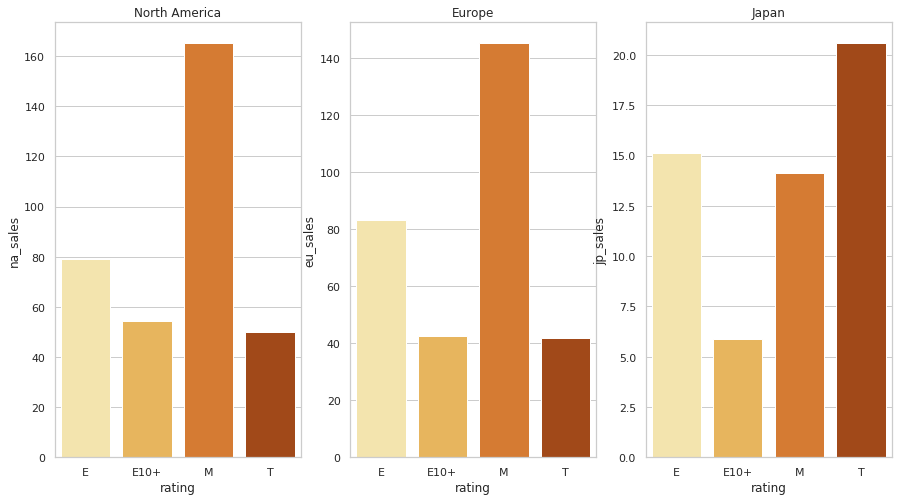

In [310]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,3, figsize=(15, 8))
i = 0
for key, value in regions.items():
    
    tmp = (act_data_games.pivot_table(index = 'rating', values = value,
                                           aggfunc = 'sum'))

    sns.barplot(x = tmp.index, y = tmp[value],palette="YlOrBr", ax=ax[i])
    ax[i].set_title(key)
    i += 1

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. <b>Игры с данным рейтингом больше преподчитают в Японии, популярен среди всез возрастных категорий</b>

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.<b>Рейтинг фаворит в Северной Америке и Европе - рейтинг игр Action и Shooter.</b>

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. <b>Игры с этим рейтингом самые любимые в стране восходящего солнца. Производитель старается охватить самую большую аудиторию мобильных игр.</b>

<b>Так как рейтинг ESRB присваиватся играм на рынке США и Канады, в нашей выборке мало Японских игр с рейтингом. Азиатские игры больше для внутреннего использования, требующие локализацию и свою специфику. Рейтинг CERO будет более показательным по рынку Японии.</b>

## Проверим гипотезы

<b>Так как в заданных гипотезах нам необходимо проверить равенство средних двух выборок не зависимых между собой, выберем метод scipy.stats.ttest_ind.</b>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

#### Нулевую гипотезу H₀ выдвигаем следующим образом : средние пользовательские рейтинги  Xbox One и PC равны. 
#### Альтернативную гипотезу H₁ выдвигаем следующим образом : средние пользовательские рейтинги  Xbox One и PC разные. 

In [311]:
np.var(act_data_games.query('platform == "XOne"')['user_score'], ddof=1).round(2)

1.91

In [312]:
np.var(act_data_games.query('platform == "PC"')['user_score'], ddof=1).round(2)

3.04

<b>Дисперсии двух выборок неравны, значение equal_var ставим False</b>

In [313]:
alpha = .05 

results_platform = st.ttest_ind(
    act_data_games.query('platform == "XOne" & user_score.isna() == False')['user_score'], 
    act_data_games.query('platform == "PC" & user_score.isna() == False')['user_score'], equal_var = False)

display('p-значение:', results_platform.pvalue)

if (results_platform.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

0.14759594013430463

'Не получилось отвергнуть нулевую гипотезу'

In [314]:
display(act_data_games.query('platform == "XOne"')['user_score'].mean(),
                            act_data_games.query('platform == "PC"')['user_score'].mean())

6.521428571428572

6.269677419354839

<b>Полученное значение p-value на нашей выборке говорит о том, есть вероятность случайно получить одинаковую оценку геймеров. Поэтому пока не получилось отвергнуть гипотезу - Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.</b>

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Нулевую гипотезу H₀ выдвигаем следующим образом : средние пользовательские рейтинги жанров Action и Sports  равны. 
#### Альтернативную гипотезу H₁ выдвигаем следующим образом : средние пользовательские рейтинги жанров Action и Sports разные. 

In [315]:
np.var(act_data_games.query('genre == "Action"')['user_score'], ddof=1).round(2)

1.77

In [316]:
np.var(act_data_games.query('genre == "Sports"')['user_score'], ddof=1).round(2)

3.18

<b>Дисперсии двух выборок неравны, значение equal_var ставим False</b>

In [317]:
alpha = .05 

results_genre = st.ttest_ind(
    act_data_games.query('genre == "Action" & user_score.isna() == False')['user_score'], 
    act_data_games.query('genre == "Sports" & user_score.isna() == False')['user_score'], equal_var = False)

display('p-значение:', results_genre.pvalue)

if (results_genre.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

1.4460039700704315e-20

'Отвергаем нулевую гипотезу'

<b>Полученное значение p-value на нашей выборке говорит о том, что вероятность случайно получить одинаковую оценку геймеров для жанров Action и Sports крайне мала. Поэтому исходя из нашей выборки пока отвергаем нулевую гипотезу.</b>

## Общий вывод

### В ходе анализа мирового рынка компьтерных игр было сделано следующее:
###### Подготовили данные:

* Заменили названия столбцов
* Преобразовали данные в нужные типы.
* Обработайли пропуски при необходимости:
* Посчитайли суммарные продажи во всех регионах и запишите их в отдельный столбец.
   
##### Проведите исследовательский анализ данных:

* Посмотрели, сколько игр выпускалось в разные годы.
* Посмотрели, как менялись продажи по платформам. Выбрали платформы с наибольшими суммарными продажами.
* Взяли данные за соответствующий актуальный период. 
* Выбрали несколько потенциально прибыльных платформ.
* Построили график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 
* Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
* Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. 
* Соотнесли выводы с продажами игр на других платформах.
* Посмотрели на общее распределение игр по жанрам. 

##### Составьте портрет пользователя каждого региона:

* Определили для пользователя каждого региона (NA, EU, JP):
    * Самые популярные платформы (топ-5).
    * Самые популярные жанры (топ-5).
    * Выявили влияет ли рейтинг ESRB на продажи в отдельном регионе?
   
##### Проверили гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<h3> Исходя из выборки данных можно сделать следующие выводы.</h3>

<b>Для планирования компании по продвижению и продаже игр стоит опираться на следующие критерии:</b>
***
* <b>во-первых часть света, в которой планируем продажи. Исходя из территории меняются и платформа, и жанр. По платформам NA, Europe - PS4, XOne; Japan - 3DS. Жанры, в NA, Europe больше предпочитают Action и Sports, в Японии Role-playing.</b>
*** 
* <b>во-вторых это оценки критиков и геймеров. Если мы собираемся продавать игры на платформах с большимим продажами, следует опираться на оценки геймеров. Если же сделаем ставку на перспективные платформы, то здесь оценки пользователей на первых порах не следует учитывать. Если собираемся продвигать игры в Японии следует плотнее работать с потребителями с точки зрения контента и обратной связи. Также очень важна локализация игр на территории Японии.</b>
***
* <b>в-третьих - возрастная категория. Показательное распределение - в Европе и США преобладают игры с рейтингом M "Mature" - взрослый контент. Тогда как в Японии - T "Teen" - подростковый возраст - основная аудитроия.</b>
